In [25]:
import numpy as np
from models import *
import datetime
from utils import *
import random
import glob
from os.path import join, getctime, basename
from keras.models import load_model
from shutil import rmtree

%load_ext autoreload
%autoreload 2

# Create result folders 
save_path = join(get_save_path(), 'ConvMixGRU')
new_path = join(save_path, 'best_val')
time = str(datetime.datetime.now()).replace(' ', '_')
workpath = join(save_path, time)
ensure_dir(new_path)
ensure_dir(workpath)
ensure_dir(save_path)

# Load preprocessed data
aug_data = load_data_pickle(get_save_path())
x_train = aug_data['x_train']
y_train = aug_data['y_train']
x_valid = aug_data['x_valid']
y_valid = aug_data['y_valid']
x_test = aug_data['x_test']
y_test = aug_data['y_test']
x_train = np.transpose(x_train, (0, 2, 1))
x_valid = np.transpose(x_valid, (0, 2, 1))
x_test = np.transpose(x_test, (0, 2, 1))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_valid.shape)
print(y_valid.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading data pickle...
Data pickle loaded.
(6960, 250, 22)
(6960, 4)
(1772, 250, 22)
(1772, 4)
(1500, 250, 22)
(1500, 4)


In [26]:
config = {
    # Network
    'num_inputs': x_train.shape[0],
    'input_shape': (x_train.shape[1],x_train.shape[2],1),
    'epochs': 50,
    'dropout': 0.5,
    'batch_size': 32,
    'l2': 0.03,
    'LSTM': False,
    'lr': 0.001
}

In [27]:
ConvMixGRU = ConvMixGRU()
ConvMixGRU.build_model(config)
history = ConvMixGRU.train(x_train, y_train, x_valid, y_valid, config, workpath)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 241, 22)           4862      
                                                                 
 batch_normalization_4 (Bat  (None, 241, 22)           964       
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 120, 22)           0         
 g1D)                                                            
                                                                 
 gru_4 (GRU)                 (None, 120, 44)           8976      
                                                                 
 dropout_8 (Dropout)         (None, 120, 44)           0         
                                                                 
 flatten_4 (Flatten)         (None, 5280)             

In [28]:
raw = ConvMixGRU.evaluate(x_test, y_test)
print("Raw Acc result: {}".format(raw[1]))
replace_model_if_better('ConvMixGRU.pickle', np.mean(raw[1]), ConvMixGRU, config)

56/56 [==============================] - 1s 9ms/step - loss: 1.6530 - accuracy: 0.6242
Raw Acc result: 0.6241534948348999
Old model exists. Comparing performance.
New model is worse than the old one. Will not update the old model


False

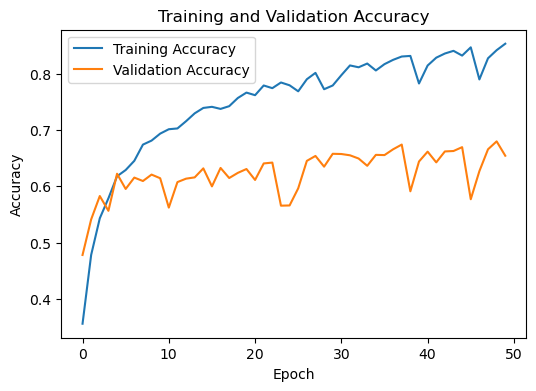

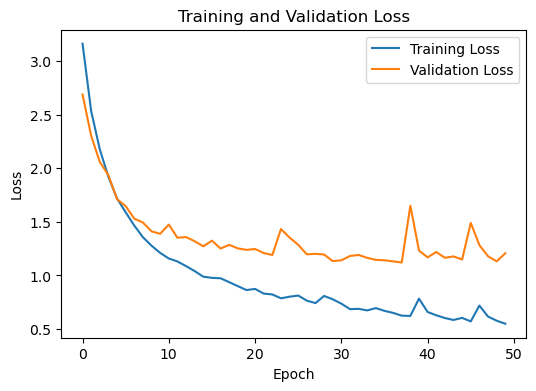

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()